## Import Libraries

In [80]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

## Load the Dataset

In [81]:
file_path = 'bank_transactions_data_2.csv'
data = pd.read_csv(file_path)

## Display Dataset Information

In [82]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acc

## Display First Few Rows

In [83]:
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70           

## Descriptive Statistics for Numerical Columns

In [84]:
numerical_columns = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']
print("\nDescriptive statistics for numerical columns:")
print(data[numerical_columns].describe())



Descriptive statistics for numerical columns:
       TransactionAmount  TransactionDuration  AccountBalance  LoginAttempts
count        2512.000000          2512.000000     2512.000000    2512.000000
mean          297.593778           119.643312     5114.302966       1.124602
std           291.946243            69.963757     3900.942499       0.602662
min             0.260000            10.000000      101.250000       1.000000
25%            81.885000            63.000000     1504.370000       1.000000
50%           211.140000           112.500000     4735.510000       1.000000
75%           414.527500           161.000000     7678.820000       1.000000
max          1919.110000           300.000000    14977.990000       5.000000


## Plot Distributions

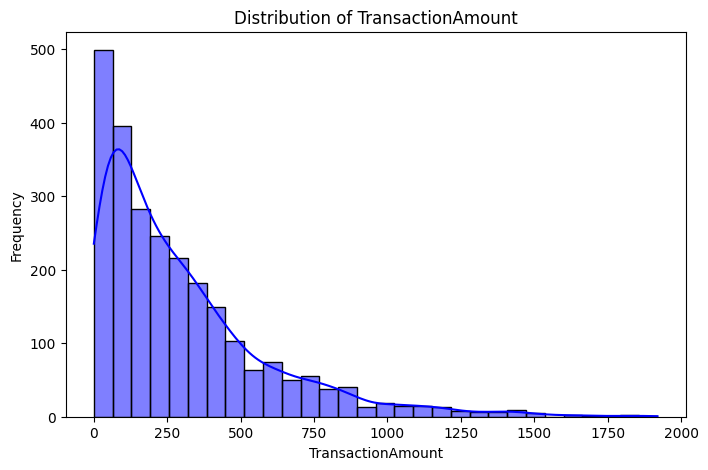

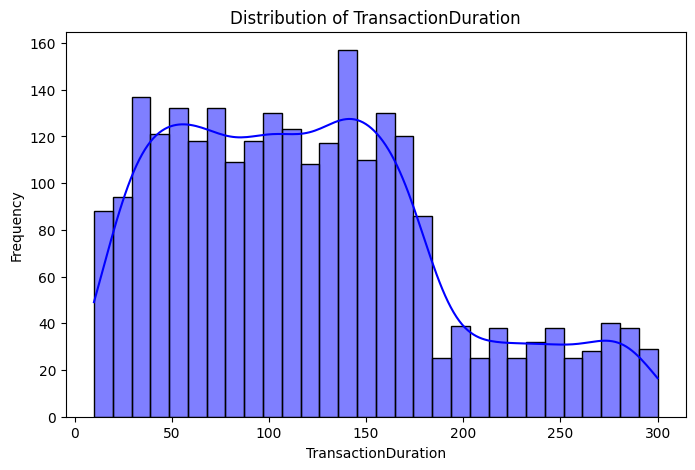

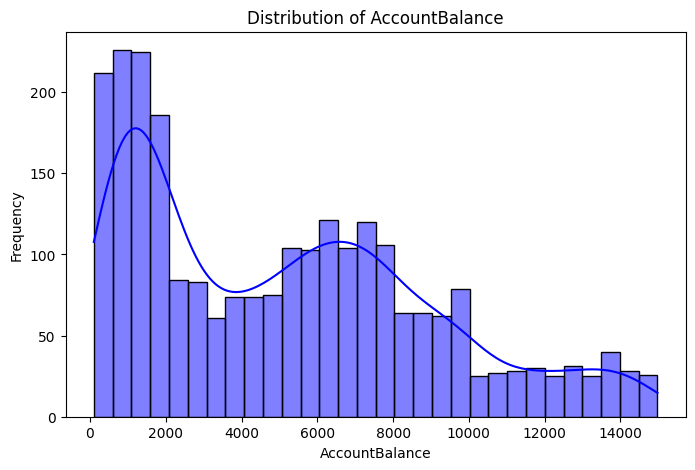

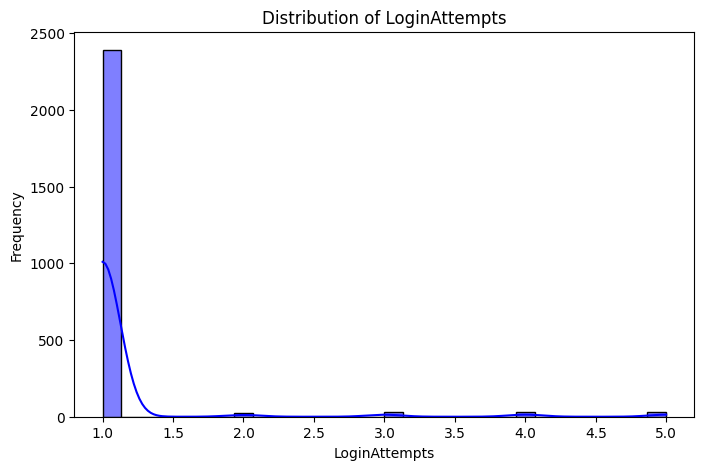

In [85]:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


## Correlation Matrix


In [86]:
print("\nCorrelation matrix for numerical columns:")
correlation_matrix = data[numerical_columns].corr()
print(correlation_matrix)



Correlation matrix for numerical columns:
                     TransactionAmount  TransactionDuration  AccountBalance  \
TransactionAmount             1.000000             0.004359       -0.025165   
TransactionDuration           0.004359             1.000000        0.005577   
AccountBalance               -0.025165             0.005577        1.000000   
LoginAttempts                -0.008445             0.032639        0.014999   

                     LoginAttempts  
TransactionAmount        -0.008445  
TransactionDuration       0.032639  
AccountBalance            0.014999  
LoginAttempts             1.000000  


## Correlation Heatmap

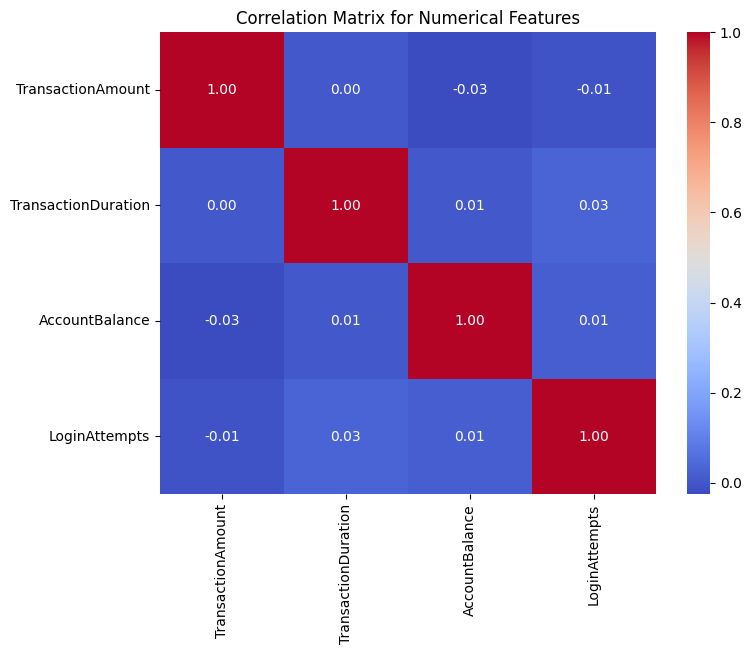

In [87]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Numerical Features")
plt.show()


## Check Missing Values

In [88]:
print("\nNumber of missing values in each column:")
print(data.isnull().sum())


Number of missing values in each column:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## Check Unique Values in LoginAttempts

In [89]:
print("\nUnique value counts in LoginAttempts:")
print(data['LoginAttempts'].value_counts())



Unique value counts in LoginAttempts:
LoginAttempts
1    2390
5      32
4      32
3      31
2      27
Name: count, dtype: int64


## Feature Selection

In [90]:
selected_features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance']
print("\nSelected features for the model based on analysis:")
print(selected_features)


Selected features for the model based on analysis:
['TransactionAmount', 'TransactionDuration', 'AccountBalance']


## Import Features

In [91]:
X = data[selected_features]

## Feature Standardization

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Plot the Dendrogram

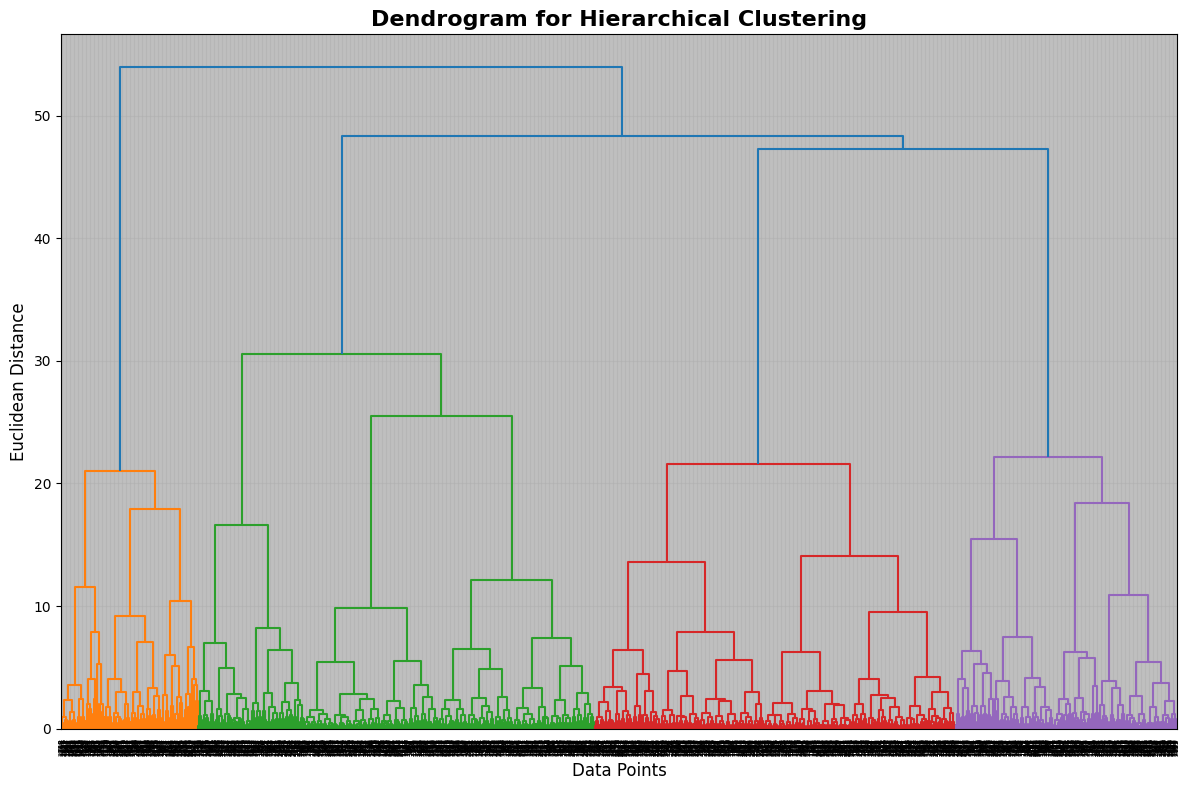

In [93]:
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering", fontsize=16, fontweight="bold")
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Euclidean Distance", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


## Choose the Number of Clusters


In [94]:
optimal_clusters = 4

## Training Agglomerative Clustering

In [95]:
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(X_scaled)

## Visualize the Clusters

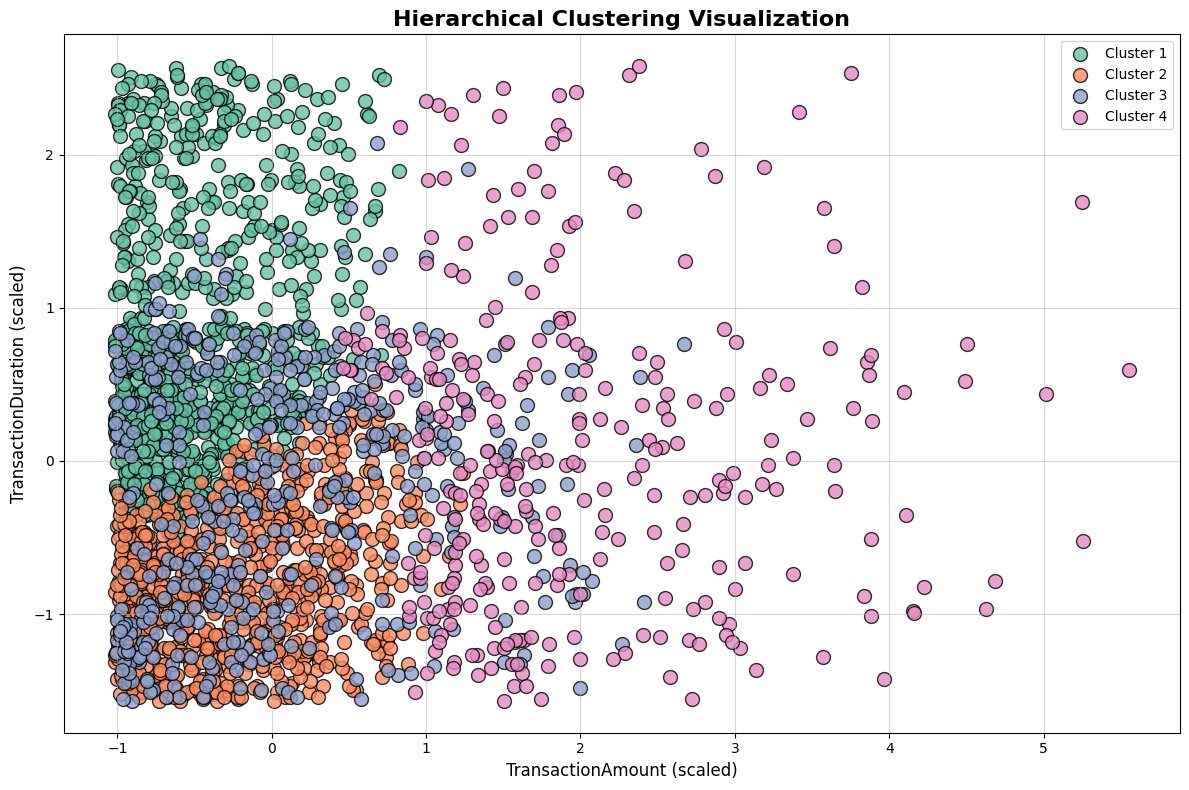

In [96]:
def visualize_hierarchical_clusters(X_scaled, clusters, selected_features, palette=None):
    if palette is None:
        palette = sns.color_palette("Set2", len(set(clusters)))

    plt.figure(figsize=(12, 8))
    for i, color in enumerate(palette):
        plt.scatter(
            X_scaled[clusters == i, 0],
            X_scaled[clusters == i, 1],
            s=100,
            c=[color],
            label=f'Cluster {i + 1}',
            edgecolor="black",
            alpha=0.8
        )
    plt.title("Hierarchical Clustering Visualization", fontsize=16, fontweight="bold")
    plt.xlabel(f"{selected_features[0]} (scaled)", fontsize=12)
    plt.ylabel(f"{selected_features[1]} (scaled)", fontsize=12)
    plt.legend(fontsize=10, loc="best")
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# Call the function to visualize hierarchical clustering
visualize_hierarchical_clusters(
    X_scaled=X_scaled,
    clusters=cluster_labels,
    selected_features=selected_features
)


## Recommendations

In [97]:
print("\n--- Recommendations for Banks ---")
print("\n1. Fraud Detection")
print("   Use clusters to identify unusual transaction patterns, such as:")
print("   - Very high or low transaction amounts.")
print("   - Transactions completed much faster or slower than usual.")
print("   Pay special attention to outliers, as they may indicate fraud.")

print("\n2. Customer Segmentation")
print("   Group customers into meaningful segments like:")
print("   - High-value customers with consistent spending.")
print("   - Moderate or low spenders with irregular patterns.")
print("   Personalize marketing campaigns and financial products for each group.")

print("\n3. Monitor Transaction Trends")
print("   Track clusters with spikes in transaction frequency or value.")
print("   Use these insights to prepare for peak times, like:")
print("   - Optimizing ATM cash supply.")
print("   - Strengthening fraud monitoring during high-risk periods.")

print("\n4. Address Anomalies")
print("   Focus on transactions that don't fit into any cluster or deviate significantly.")
print("   Investigate these anomalies with risk management teams.")

print("\n5. Predict Customer Behavior")
print("   Use clusters to predict customer needs, such as:")
print("   - Anticipating large transactions or dormant account reactivations.")
print("   - Offering personalized loans, credit cards, or financial plans.")

print("\n6. Improve Security")
print("   Analyze clusters with prolonged transaction durations or high login attempts.")
print("   Strengthen security measures like multi-factor authentication.")

print("\n7. Optimize Banking Operations")
print("   Allocate resources to clusters with high transaction volumes.")
print("   Enhance customer service for valuable segments.")

print("\n8. Next Steps")
print("   - Integrate these clustering insights into fraud detection and CRM systems.")
print("   - Update clusters regularly to reflect changing customer behaviors.")
print("   - Collaborate across teams to use these insights effectively.")

print("\n--- End of Recommendations ---")



--- Recommendations for Banks ---

1. Fraud Detection
   Use clusters to identify unusual transaction patterns, such as:
   - Very high or low transaction amounts.
   - Transactions completed much faster or slower than usual.
   Pay special attention to outliers, as they may indicate fraud.

2. Customer Segmentation
   Group customers into meaningful segments like:
   - High-value customers with consistent spending.
   - Moderate or low spenders with irregular patterns.
   Personalize marketing campaigns and financial products for each group.

3. Monitor Transaction Trends
   Track clusters with spikes in transaction frequency or value.
   Use these insights to prepare for peak times, like:
   - Optimizing ATM cash supply.
   - Strengthening fraud monitoring during high-risk periods.

4. Address Anomalies
   Focus on transactions that don't fit into any cluster or deviate significantly.
   Investigate these anomalies with risk management teams.

5. Predict Customer Behavior
   Use clu

## Number Of Clusters
## In K-Means = 3
## In Hierarchical (Agglomerative) = 4
## Determine depend on Silhouette Score

In [98]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Calculate Silhouette Score for K-Means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for K-Means (3 clusters): {kmeans_silhouette:.3f}")

# Calculate Silhouette Score for Hierarchical Clustering (4 clusters)
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)
hc_silhouette = silhouette_score(X_scaled, hc_labels)
print(f"Silhouette Score for Hierarchical Clustering (4 clusters): {hc_silhouette:.3f}")


Silhouette Score for K-Means (3 clusters): 0.284
Silhouette Score for Hierarchical Clustering (4 clusters): 0.223
